In [4]:
import plotly

In [5]:
import numpy as np                             #Importing Numpy library as np
import pandas as pd                            #Importing Pandas library as pd
import os                                      #Importing Numpy library as np
import matplotlib.pyplot as plt                #Importing Matplotlib.pyplot library as plt
import seaborn as sns                          #Importing Seaborn library as sns
import warnings                                #Importing warnings library
warnings.filterwarnings('ignore')              #This Filter warnings is used to control the ignored exception        
import plotly.offline as py                    #Importing plotly.offline
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format


In [6]:
data = pd.read_csv('student-mat.csv')  #Loading the CSV File

In [21]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [7]:
data.head()                            #Used to display the first 5 rows.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Describing the data

In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


Number of Female and Male students living in Rural and Urban areas

In [23]:
data.groupby(by=['sex',"address"]).size()

sex  address
F    R           44
     U          164
M    R           44
     U          143
dtype: int64

Percentage of grades of Students living in urban and rural areas.


In [25]:
data.groupby(by=['sex',"address"])["G3"].mean()

sex  address
F    R                         9.27
     U                        10.15
M    R                         9.75
     U                        11.27
Name: G3, dtype: float64

In [29]:
data.groupby(by=['reason']).agg({"G1":"mean","G2":"mean","G3":"mean"})

,G1,G2,G3
reason,,,
course,10.60,10.17,9.82
home,10.82,10.74,10.26
other,10.83,11.22,11.17
reputation,11.46,11.26,11.14


From the above calculations we can say that reasons to choose school like "near to home", "school reputation", "course in the scool" does not affect student final grades much, but reputation of school is much closer, we can think of this is one of the reason to get higher grades in finals.


Text(0.5, 1.0, 'Gender of students : F - female,M - male')

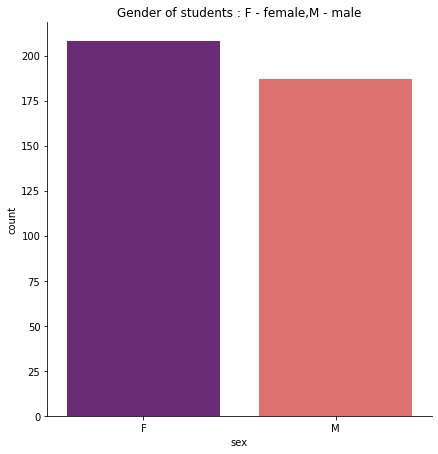

In [4]:
sns.catplot(x="sex", kind="count",palette="magma", data=data, height = 6)
plt.title("Gender of students : F - female,M - male")   
#This is used to show the relationship between numerical and one or more categorical variables.
#In this particular case we used to see the relationship between the genders.

From above graph we can say female students count is little more than male students count. Now let's pay attention to the age of students.

In [5]:
ages = data["age"].value_counts() 
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")              
#This entire block of code is used to caluclate the age of the students and 
#iplot is used to draw ployly graphs without connecting to an external server.

Basically, we are dealing with students 15-18 years. The most beautiful, but very often is a difficult age. 
we assume, for example, that the younger the student the less likely that he uses alcohol.Teenagers want to relax more with friends and learn less math or other courses. Then let's see how many hours a week students spend on their studies.


In [6]:
data['st_time'] = np.nan
df = [data]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data["st_time"].unique().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["pink", "cyan", "green", "yellow"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')                                    
#This block of code is used to know the no. of hours a student spend on studying and a pie chart has ploted accordingly using iplot.

Most students spend 2 to 5 and 5 to 10 hours a week studying. It would be better if we had the exact number of hours for each student.
Personally, we think a student who spends 5 hours a week studying is a diligent student. 
2 hours is not always enough. But we can pay attention to the impact of the number of hours spent on study on the final grade of the student.

<AxesSubplot:title={'center':'Box plot for final grades,depending on the study time'}, xlabel='G3', ylabel='st_time'>

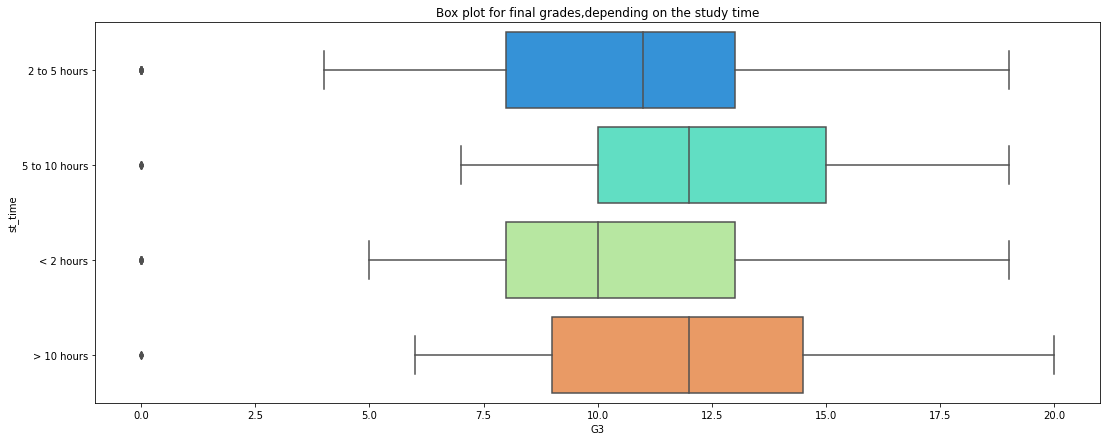

In [7]:
plt.figure(figsize=(18,7))                                                      #Specifying the figure size
plt.title("Box plot for final grades,depending on the study time")              #This block of code is used to visualize the final grades depending on their study time
                                                                                # and seaborn library is used to display the box plot
sns.boxplot(y="st_time", x="G3", data = data , orient="h", palette = 'rainbow')

The above box plot shows the final grades depending upon the stud time per week. The lowest average result is shown by students who spend less than two hours a week studying. From this we can conclude that studying less than 2 hours a week is not enough, study more ours to get good final grades. Few students spend more than 10 hours a week studying. But they show a very good result. 

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

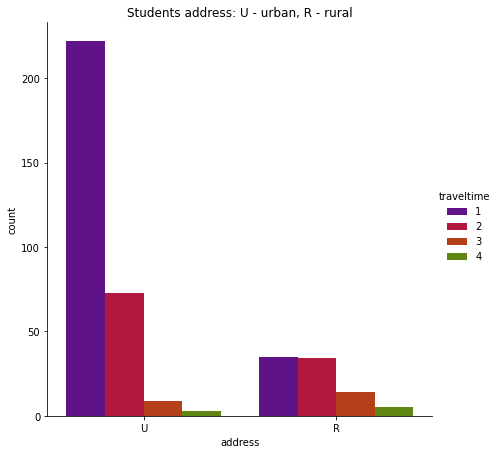

In [8]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address: U - urban, R - rural")          #This block of code is used to display the relationship between the student address if they are living in Urban or Rural.

Most of the students live in the city. 
Few students take long to get to school.
But still, let's see if this affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

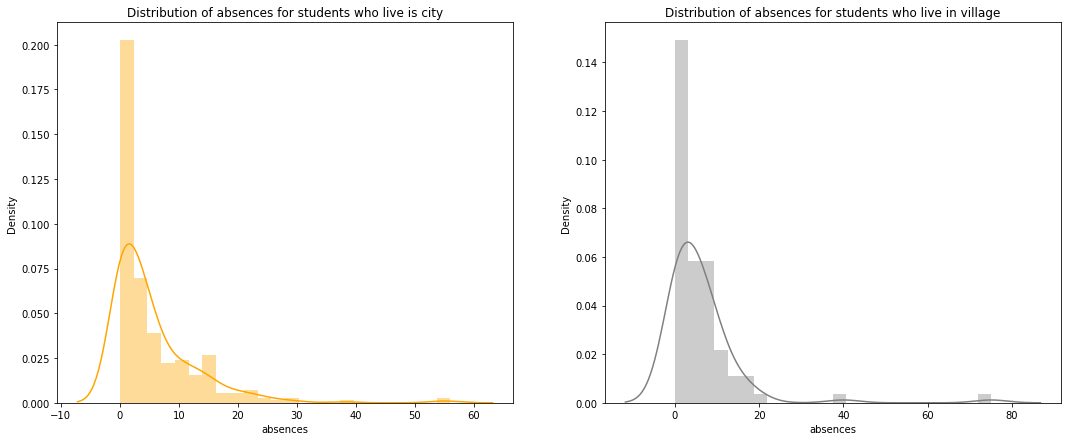

In [9]:
f= plt.figure(figsize=(18,7))                                             
#In this block of code we used seaborn library and we plotted diagrams that resembles the absence of students
#who live in village and city.

ax=f.add_subplot(121)
sns.distplot(data[(data.address == 'U')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(data[(data.address == 'R')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

Yet among the students living in the village there are people with a lot of absences. 
But while we can not say for sure that this is due to the fact that the student does not live in the city. But of course this may be due to traffic jams on the road or not a very good transport schedule. 

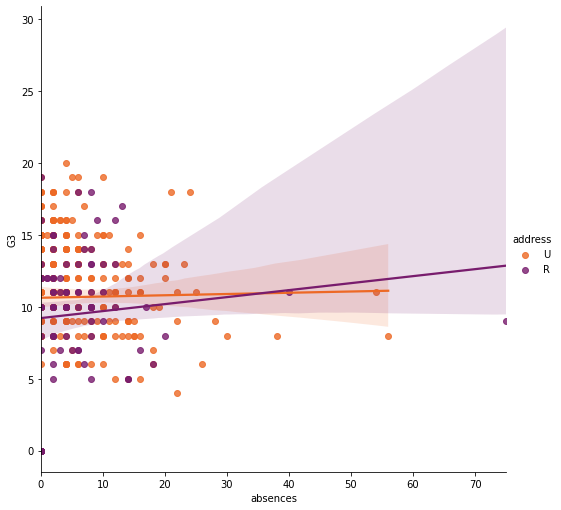

In [10]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=data, palette = 'inferno_r', size = 7)    

Let's study students absences in more detail. We have information about the romantic relationships of students: there is a relationship or not.
Given the age of our students, we can assume that love has an important place in their lives. Let's see if the presence of love and relationships affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

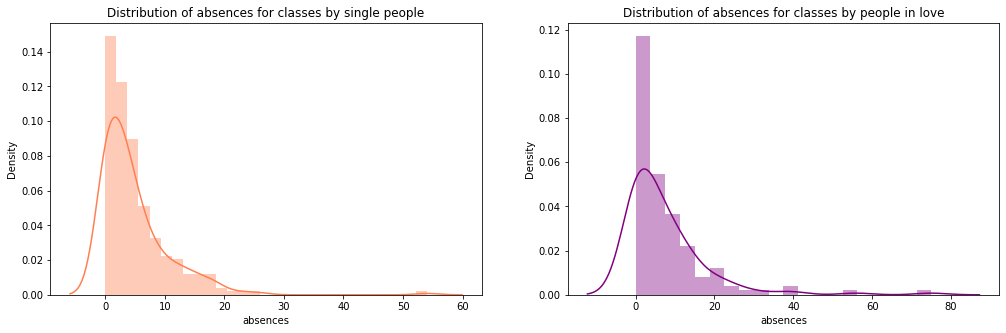

In [11]:
#This block of code represents the distributed plot between the absence of people who are single and 
#who are in love and the differences can be compared using the distribute plot diagrams.
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

Single people miss fewer classes than students in love. Let's see if love affects the final grade of teenagers who are in love.

Text(0.5, 1.0, 'Distribution of grades in people in love')

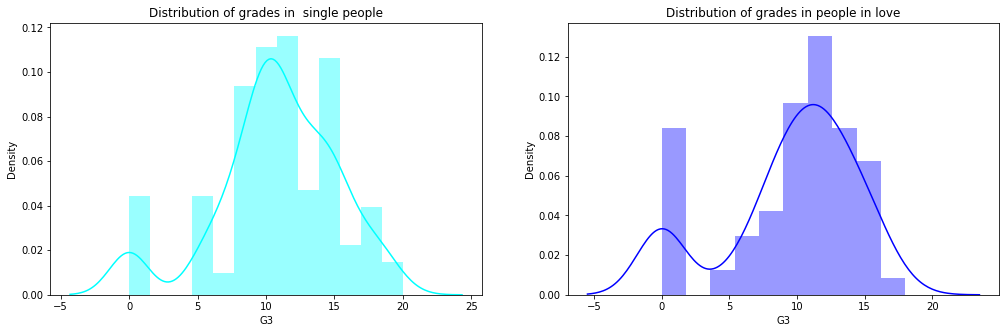

In [12]:
f= plt.figure(figsize=(17,5))  
# This block of code is used to visualise the no. of failures of people who are in love to those who are single
#and the distributed plot shows that single people passed more than the people who are in relation.

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

The final grades of single students are slightly higher than those who are in a romantic relationship. 
Of course, this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook. Let's count the number of single students and those who are in a relationship.

Text(0.5, 1.0, 'How many students are in a romantic relationship?')

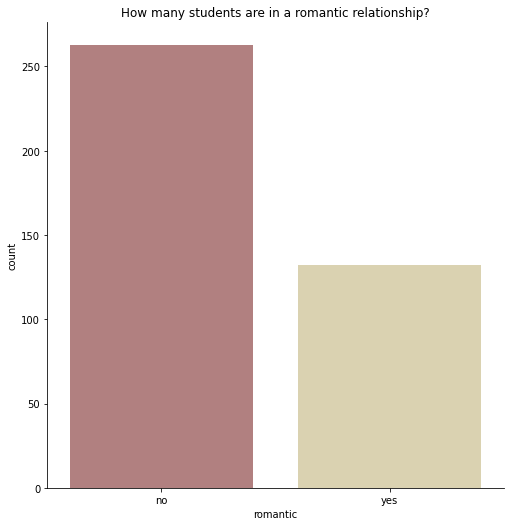

In [13]:
sns.catplot(x="romantic", kind="count",palette="pink", data=data, height = 7)
plt.title("How many students are in a romantic relationship?")

#In this block of code we calculated the total number of students that are in romantic life and 
#total students who are not in romantic relationship.

Now consider one very important thing. Students health! In our sample of very young teenagers and we hope that they all have excellent health.

In [14]:
labels = data["health"].unique().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]         #Each color describes the values of the health status.

trace = go.Pie(labels=labels, values=amount,                   #We used Graph Objects library here which automatically generates the hierarcy of python classes.
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')

#This block of code represents the health status of the students health and for this 1 is very bad and 5 is very good.

To be honest, we would like to see a completely green circle. Let's see if the health of the student affects final grades and the number of passes.

<AxesSubplot:title={'center':'Box plot for final grades,depending on current health'}, xlabel='G3', ylabel='health'>

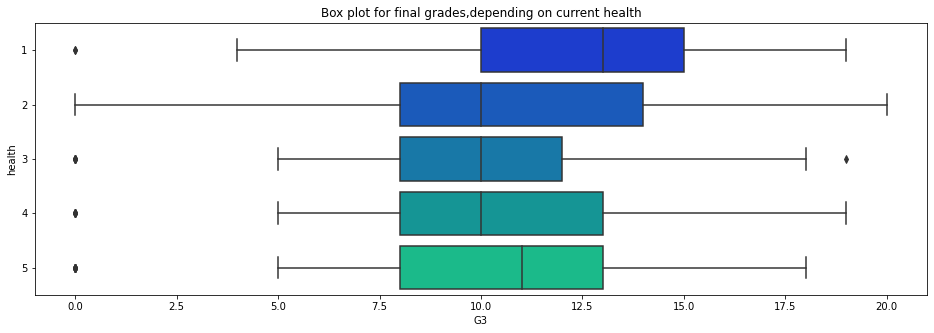

In [15]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = data , orient="h", palette = 'winter')
#This block of code represents how the health conditions effected the students final grades and they state that 66 students have very poor health.

Interesting situation. In our enrollment, 
66 students have very poor health. 
But, neverthleess their final estimates are quite high. I hope that they think not only about their success in school but also about health! Also, students with very good health have high final grades. Now look at the absenteeism.

We have data on the amount of alcohol consumed by students on weekdays("Dalc") and
weekends("Walc").The main thing we are interested in is whether the amount of alcohol consumed affects success in school. Let's start with alcohol consumption on weekdays. 

In [16]:
labels = data["Dalc"].unique().tolist()
amount = data["Dalc"].value_counts().tolist()

colors = ["pink","lightgreen","white","cyan","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'rt')

#In this block code we use the similar format as of Health status using a different column and 
#the pie chart represents on scale of 1 - 5 where 1 is very low and 5 is very high.


Most students prefer to spend a week sober or almost without alcohol. But still there is someone who likes to drink on a weekday. Let's see if that affects student grades and absences.

Text(0.5, 1.0, 'Distribution of absences for people who consume little alcohol on weekdays')

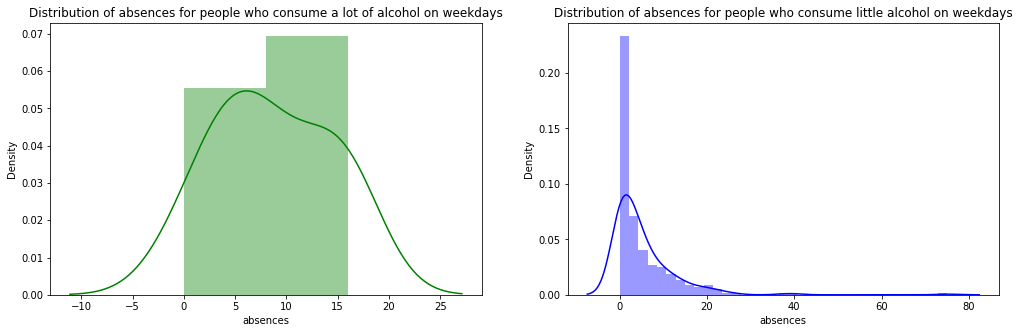

In [17]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays')
# In this block of code we calculated the absent people who consumed alcohol using Seaborn library and also Matplotlib.

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekdays')

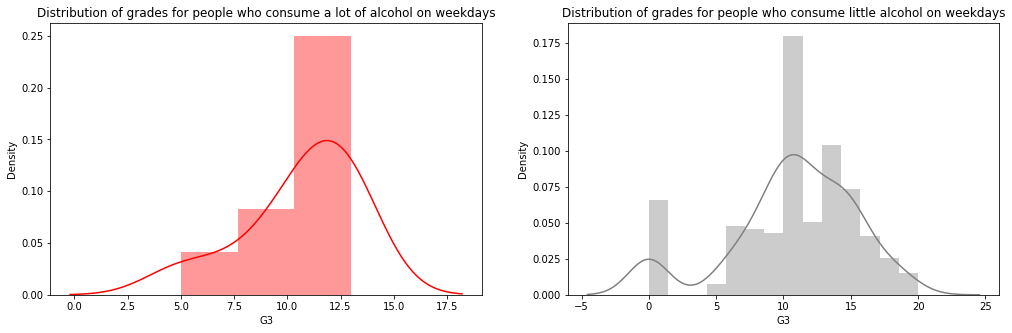

In [18]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')



Drinking alcohol on weekdays is a bad idea. Of course, the number of those who love to drink on weekdays is much less than the number of those who prefer to spend weekdays sober. But we can see that the final grades of these students are significantly lower. Let's look at the situation with the consumption of alcohol on the weekend.

In [19]:
labels = data["Walc"].unique().tolist()
amount = data["Walc"].value_counts().tolist()

colors = ["yellow","cyan","green","orange","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 't')

#In this block of code we used the group object and a different column Walc which stands for 
#weekend alcohol consumption to calculate the no of peopele's grades effected due to alcohol.

Of course the situation has changed. On weekends, more students like to relax and drink.

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekend')

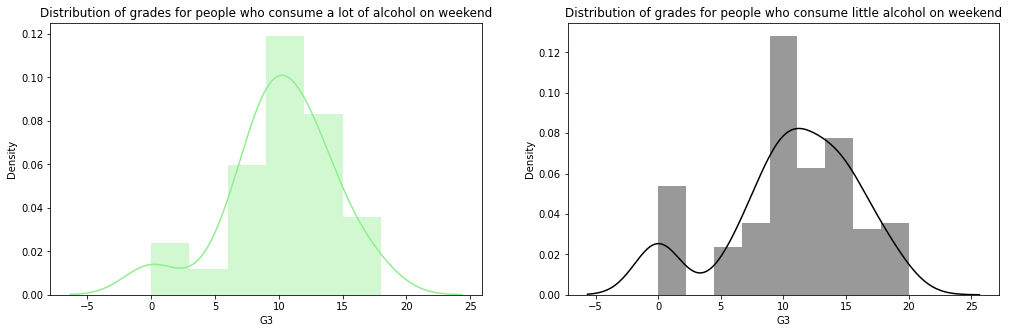

In [20]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Walc == 5)]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend')

ax=f.add_subplot(122)
sns.distplot(data[(data.Walc == 1)]['G3'],color='black',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend')

# In this we used distributed plot using seaboarn library to represent the relation between people who consume more alcohol and a little alcohol.

 Seems consuming alcohol on weekend will not affect the grades at school (but better not abuse). On this happy note, we propose to consider one more important thing - additional paid courses that the student attends. It is good when a student wants to study extra, and parents have the opportunity to pay for courses. This can tell us not only about the commitment of the student, but also about the social status of the family. Personally, we did not understand as a child how important it is to engage not only in school, but also on their own. Let's see.

Text(0.5, 1.0, 'Distribution of final grades and age for students who have additional paid classes')

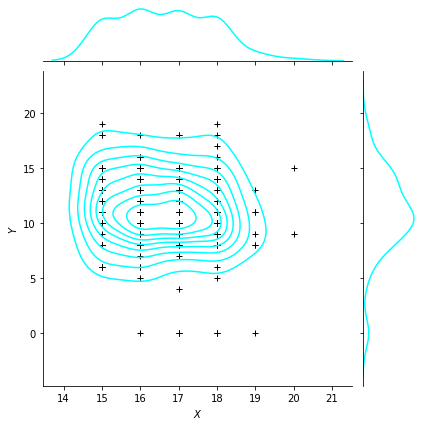

In [24]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'yes')],kind="kde", color="cyan")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of final grades and age for students who have additional paid classes')

#This block of code represents a scattered plot graph of the students who have enrolled for additional classes and the major library we used here is seaborn.

Text(0.5, 1.0, 'Distribution of final grades and age for students who do not have additional paid classes')

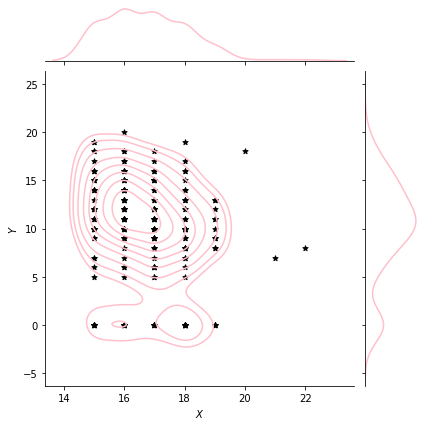

In [25]:
g = sns.jointplot(x="age", y="G3", data = data[(data.paid == 'no')],kind="kde", color="pink")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of final grades and age for students who do not have additional paid classes')

Text(0.5, 1.0, 'Distribution of grades for students who do not have additional paid classes')

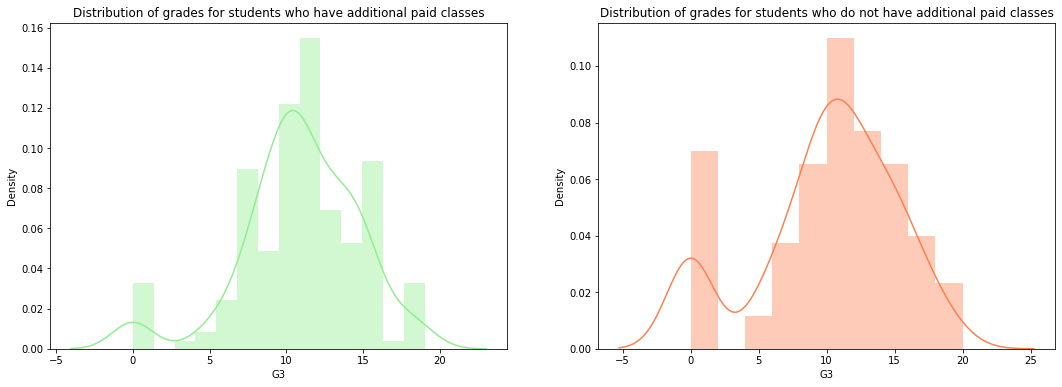

In [26]:
f= plt.figure(figsize=(18,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.paid == 'yes')]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for students who have additional paid classes')

ax=f.add_subplot(122)
sns.distplot(data[(data.paid == 'no')]['G3'],color='coral',ax=ax)
ax.set_title('Distribution of grades for students who do not have additional paid classes')

#This block of code uses Matplotlib library and it is used to distrivute the relationship between 
#the students who passed by paying for additional classes and not paying additional classes.

We also have information about the student's desire to get higher education in the future. This is useful information! Does the desire to get higher education influence the final grades ? 

Text(0.5, 1.0, 'How many students want to ger higher education?')

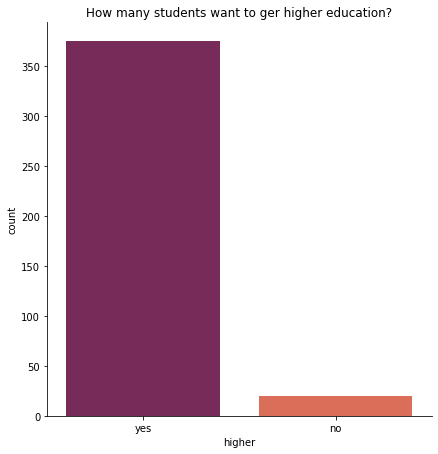

In [27]:
sns.catplot(x="higher", kind="count",palette="rocket", data=data, height = 6)
plt.title("How many students want to ger higher education?")

#This block of code represents the no. of students want to opt for higher education.

The above plot shows how many students want to go for higher education. Data shows almost all students want to get higher education.

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

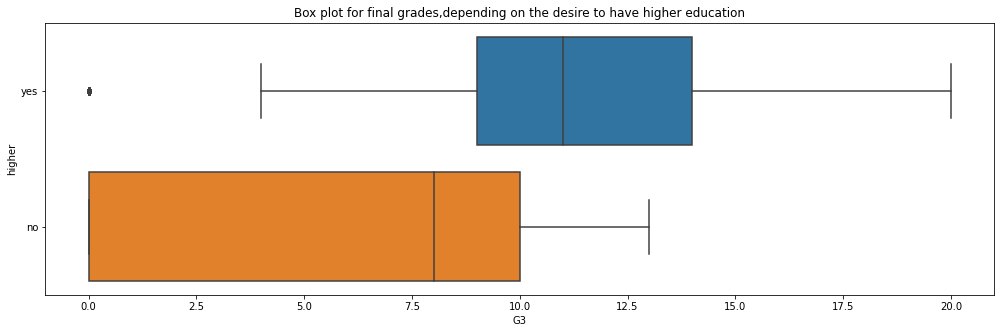

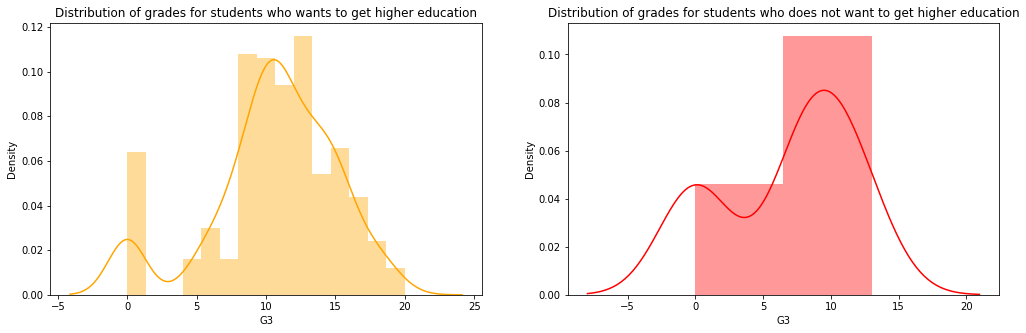

In [28]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = data , orient="h", palette = 'tab10')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.higher == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.distplot(data[(data.higher == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not want to get higher education')

#This distribution of grades for students is used to show the students who are not aiming for higher education and the effect on their grades. 

The desire to get higher education stimulates students to get higher grades. And of course I did not forget to pay attention to the presence of the Internet at the student's home. Nowadays, the Internet is very important. Quick access to information or the ability to find a solution to the problem without a long search in the textbooks.

Text(0.5, 1.0, 'How many students have not Internet (yes, i am shocked too)?')

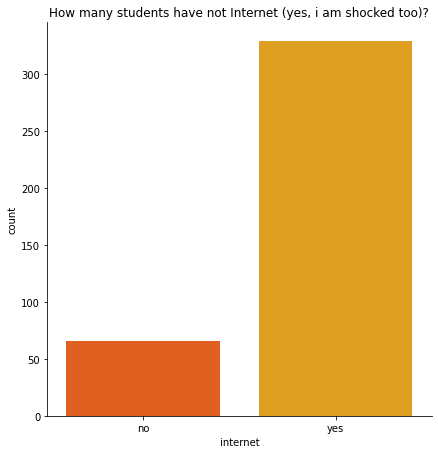

In [29]:
sns.catplot(x="internet", kind="count",palette="autumn", data=data, height = 6)
plt.title("How many students have not Internet (yes, i am shocked too)?")

#This block of code uses seaborn library to show the relationship between people who have internet and who don't have internet.

The above figure shows ow many students with and without internet access. First, let's see whether the availability of the Internet affects the number of hours students spend on their studies.

In [30]:
time1 =data[(data.internet == 'no')].st_time.value_counts()
labels = (np.array(time1.index))
sizes = (np.array((time1 / time1.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students without access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time1")

#This block of code  used to represent the pie chart of the students have no access to internet.

In [31]:
time2 =data[(data.internet == 'yes')].st_time.value_counts()
labels = (np.array(time2.index))
sizes = (np.array((time2 / time2.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students with access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time2")

#This block of code used to represent the time student has access to the internet.

<AxesSubplot:title={'center':'Box plot for final grades,depending on the access to the Internet'}, xlabel='G3', ylabel='internet'>

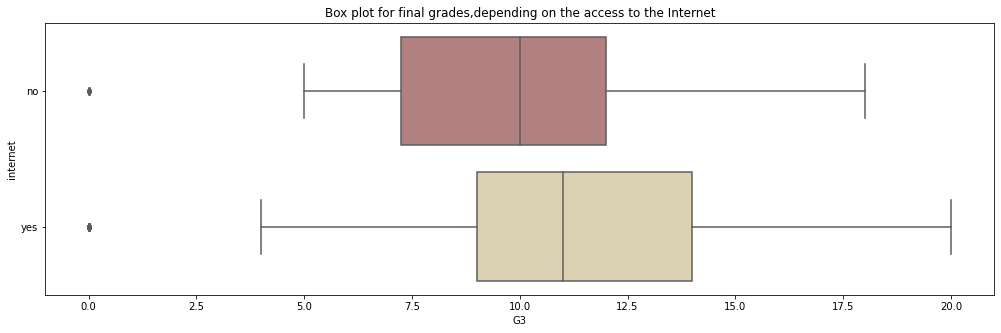

In [32]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = data , orient="h", palette= 'pink')

#This code represents the effect on students grades with access to internet and without access to internet.

From the given data and analysis, students spend less time on studies with internet access.
the last thing we'll look at is the student's family. The family plays a very important role in the development of the child. The data set gives us a lot of information about the student's family, profession and education of parents and so on. We can't just walk away! Let's start with the fact that we look at the number of people in the families of the student and the status of residence of parents: father and mother live together or not. 

Text(0.5, 1.0, 'Number of people in the family: GT3 - more than 3, LE3 - less than 3')

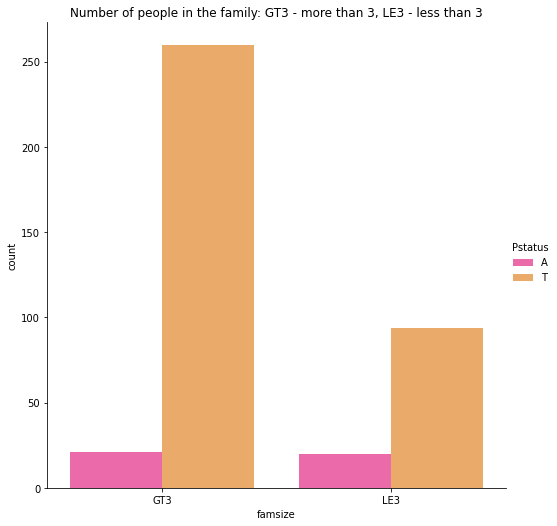

In [33]:
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=data, height = 7)
plt.title("Number of people in the family: GT3 - more than 3, LE3 - less than 3")

#We take the family data into consideration by using the Seaborn library to show the data which has families more than 3 people and less than 3 people

Most students live with their mother and father. We have a lot of information about parents of students. Let's see what the students mothers do. How many of them are doctors, housewives, and so on. 

In [34]:
labels = data["Mjob"].unique().tolist()
amount = data["Mjob"].value_counts().tolist()

colors = ["orange", "green", "yellow", "white",'cyan']

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Mother's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pi_chart')


#This block of code represents the same pattern of Health Status and Alcohol Consumption. This pie chart represents the Mother's job.

In [35]:
labels = data["Fjob"].unique().tolist()
amount = data["Fjob"].value_counts().tolist()

colors = ["coral","lightgreen","gray","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Father's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pg_chart')


#This block of code represents the same pattern of Health Status and Alcohol Consumption. This pie chart represents the Father's job.

<AxesSubplot:title={'center':'Box plot for final grades,depending on fathers profession'}, xlabel='G3', ylabel='Fjob'>

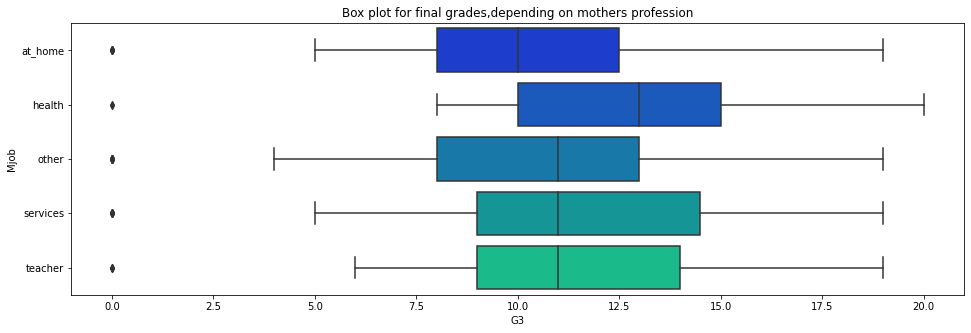

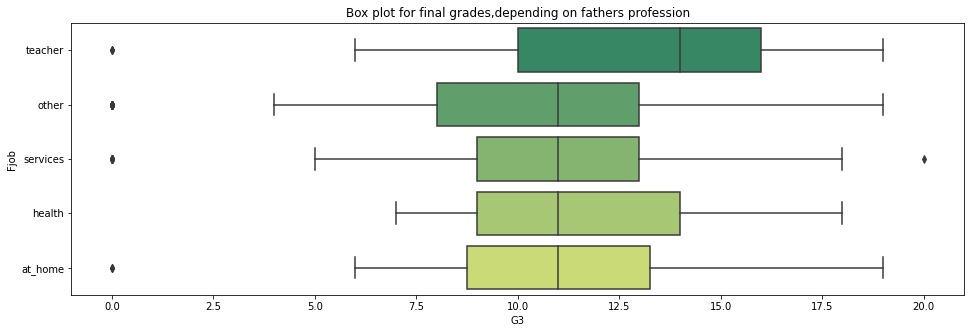

In [36]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on mothers profession")
sns.boxplot(y="Mjob", x="G3", data = data , orient="h", palette = 'winter')

plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on fathers profession")
sns.boxplot(y="Fjob", x="G3", data = data , orient="h", palette = 'summer')

# This block of code represents the searborn library using Box plotting to represent the effect of their final grades on Mother's profession and Father's profession.

Last but not least, the quality of family relationships. Quality of family relationships (from 1 - very bad to 5 – excellent).

In [37]:
labels = data["famrel"].unique().tolist()
amount = data["famrel"].value_counts().tolist()

colors = ["pink","cyan","coral","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of family relationships(numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf_chart')


#This block of code represents the same pattern of Health Status and Alcohol Consumption.
#This pie chart represents the Quality of family relationship of the students using Graph Objects module and iplot


In [38]:
labels = data[(data.Pstatus == 'T')].famrel.unique().tolist()
amount = data[(data.Pstatus == 'T')].famrel.value_counts().tolist()

colors = ["yellow","cyan","pink","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of relationships in families where parents live together (numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf1_chart')

#This block of code represents the quality of relationships in families where parents live together and to represent this code we used 

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
#sex
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
#address
le.fit(data.address.drop_duplicates()) 
data.address = le.transform(data.address)
#famsize
le.fit(data.famsize.drop_duplicates()) 
data.famsize = le.transform(data.famsize)
#Pstatus
le.fit(data.Pstatus.drop_duplicates()) 
data.Pstatus = le.transform(data.Pstatus)
#schoolsup
le.fit(data.schoolsup.drop_duplicates()) 
data.schoolsup = le.transform(data.schoolsup)
#famsup
le.fit(data.famsup.drop_duplicates()) 
data.famsup = le.transform(data.famsup)
#paid
le.fit(data.paid.drop_duplicates()) 
data.paid = le.transform(data.paid)
#activities
le.fit(data.activities.drop_duplicates()) 
data.activities = le.transform(data.activities)
#nursery
le.fit(data.nursery.drop_duplicates()) 
data.nursery = le.transform(data.nursery)
#higher
le.fit(data.higher.drop_duplicates()) 
data.higher = le.transform(data.higher)
#romantic
le.fit(data.romantic.drop_duplicates()) 
data.romantic = le.transform(data.romantic)
#internet
le.fit(data.internet.drop_duplicates()) 
data.internet = le.transform(data.internet)

# This block of code used to find out the correlation between the features. We used "Label Encoder "for binary features.


In [42]:
# This considers non binary features
data = data.drop(["st_time"], axis = 1) #This is used to create this column for one of the graphs

In [43]:
#not binary features
data= pd.get_dummies(data)

In [44]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


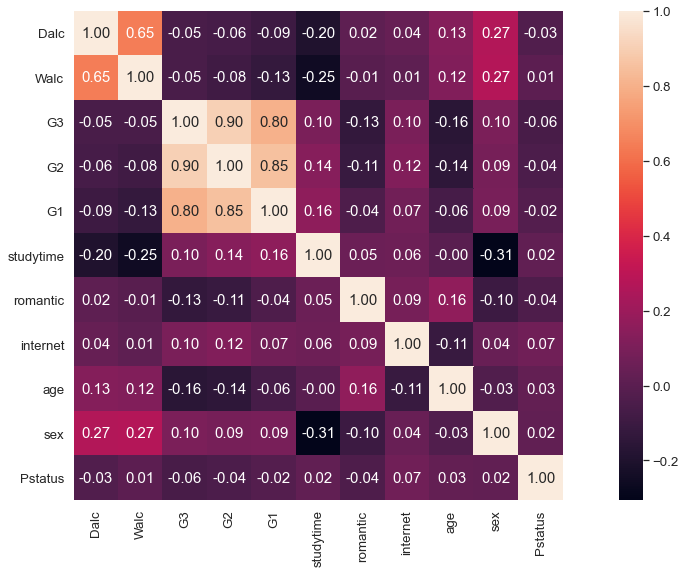

In [45]:
plt.figure(figsize=(20,9))
cols = ['Dalc','Walc','G3','G2', 'G1','studytime','romantic','internet','age','sex','Pstatus']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

#This used to calculate the correleation between the different aspects of students life effecting his grades.

Conclusion:
    
     Is there a secret of excellent grades? Certainly. And as we have seen it is to give enough time to study, not to miss classes, remember that you can not give 100% of the time to the beloved and so on. And of course not to abuse alcohol on weekdays. What about the weekend? Science gives us the right to relax on weekends.   
     
                     Thank you!